## Workshop on Practical Data Analysis in Earth and Planetary Science. Seminar 1 

every Monday at 4pm (CEST), at the Center for Planetary Habitability (PHAB), Wegener's room (1st floor, ZEB-building) and everywhere in Zoom https://uio.zoom.us/j/61896722660, Meeting ID: 618 9672 2660



### Type of data and basic access tools

Data can be represented in form of tables, images, grids collected at a point (e.g. borehole) along lines (geophysical profiles) or areas (grids). 

- Web link (URL) a unique identifier used to locate a resource on the Internet.

In [ ]:
'https://www.solarsystemscope.com/textures/download/2k_moon.jpg'
'https://view.officeapps.live.com/op/view.aspx?src=https://datapub.gfz-potsdam.de/download/10.5880.FIDGEO.2023.008-VENOun/IHFC_2023_GHFDB.XLSX'

-  Web browser URL queries consiting of a string of keywords and associated values of interest (GET request).

In [9]:
'http://www.orfeus-eu.org/fdsnws/dataselect/1/query?network=NL&station=HGN&start=2017-01-01T00:00:00&end=2017-01-01T00:01:00'

'http://www.orfeus-eu.org/fdsnws/dataselect/1/query?network=NL&station=HGN&start=2017-01-01T00:00:00&end=2017-01-01T00:01:00'

- Dropbox links

In [ ]:
'https://dl.dropboxusercontent.com/s/oigg058ur103hpyrcqnpm/geotherm.png?rlkey=p1dch773y91kunicldlnwn34o&dl=0'

'https://dl.dropboxusercontent.com/s/qmgr7se68hfwlglc8iq01/1854453C_201910260930.dat?rlkey=qq0vrditm97ua51u3lp4juhuf&dl=0'

note, to get access to the content dropbox links such as 'https://www.dropbox.com/scl/fi/' must be modified  to 'https://dl.dropboxusercontent.com/s/'

### Importing data into MATLAB and Python workspace 

$\textbf{Python}$ code example:

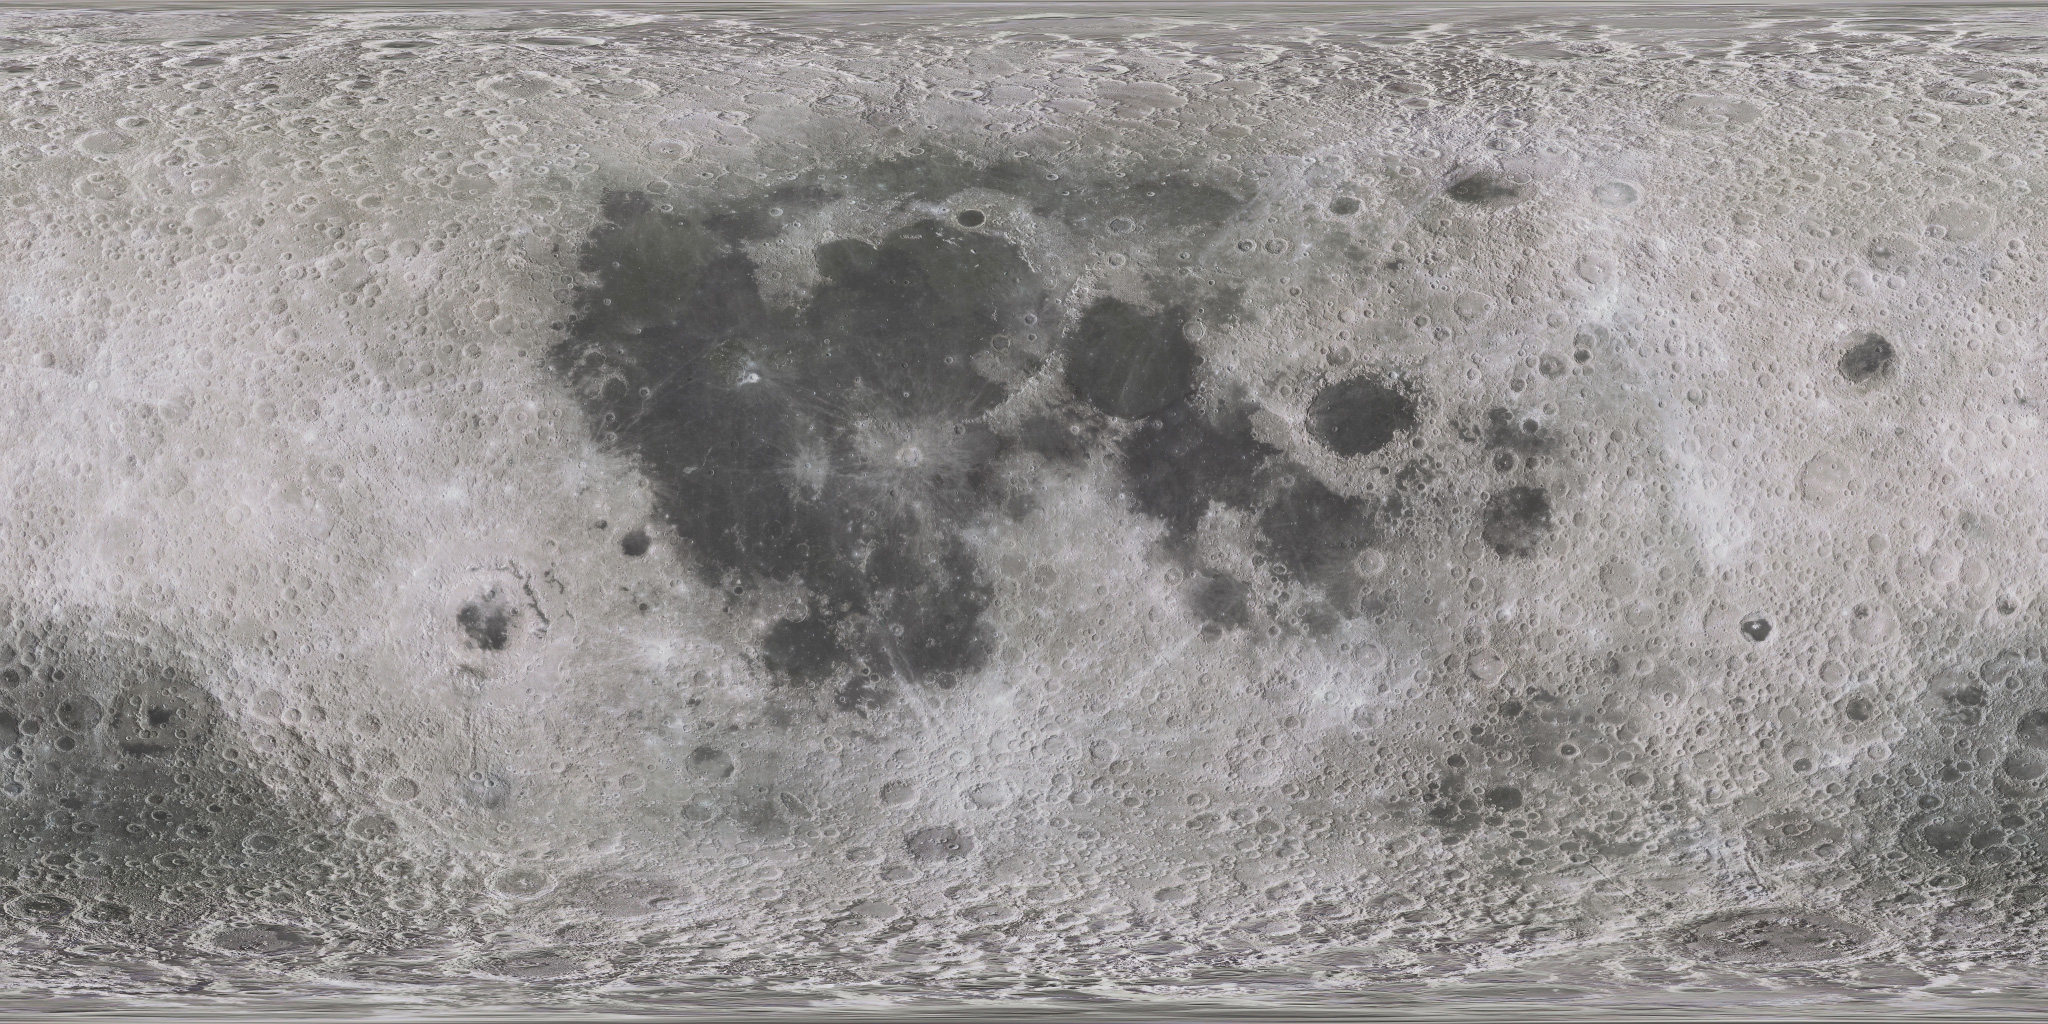

In [97]:
import IPython
url = 'https://www.solarsystemscope.com/textures/download/2k_moon.jpg'
IPython.display.Image(url, width = 250)

$\textbf{MATLAB}$ code example:

In [ ]:
websave('planet_img.jpg','https://www.solarsystemscope.com/textures/download/2k_moon.jpg')
I = imread('moon_img.jpg');
figure, imagesc(I)

### Images as 2D arrays of integer numbers

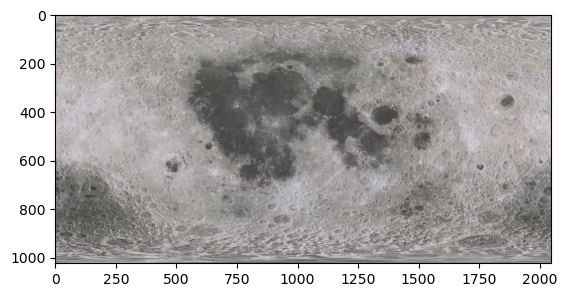

In [28]:
import urllib.request 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

urllib.request.urlretrieve('https://www.solarsystemscope.com/textures/download/2k_moon.jpg', 'planet_img.jpg')
img = np.asarray(Image.open('planet_img.jpg'))
imgplot = plt.imshow(img)

In [29]:
print(img)

[[[176 170 174]
  [176 170 174]
  [175 169 171]
  ...
  [175 169 171]
  [175 169 173]
  [175 169 173]]

 [[159 153 155]
  [158 152 154]
  [157 151 153]
  ...
  [154 148 150]
  [155 149 151]
  [156 150 152]]

 [[160 156 155]
  [160 156 155]
  [160 156 155]
  ...
  [159 155 154]
  [161 157 158]
  [162 158 159]]

 ...

 [[154 150 149]
  [154 150 149]
  [154 150 149]
  ...
  [158 151 159]
  [157 150 158]
  [156 149 157]]

 [[188 182 182]
  [188 182 182]
  [188 182 182]
  ...
  [187 180 187]
  [187 180 187]
  [187 180 187]]

 [[137 131 133]
  [137 131 133]
  [137 131 133]
  ...
  [135 130 126]
  [135 130 126]
  [136 131 127]]]


### Exercise 

Try to upload images for other planets replacing the filename in the weblink


### Reading tables

Importing geochemical data from Georoc database.

Example in MATLAB

In [44]:
websave('geochem_table.csv','https://dl.dropboxusercontent.com/s/m4ps6q2wsccfonv9hns6h/2023-06-WFJZKY_ICELAND.csv?rlkey=i5lpxacxshc61jjp5b44p0kbz&dl=0');
T = readtable('geochem_table.csv');

x1 = T.AL2O3_WT__(1:100);
y1 = T.MGO_WT__(1:100);

%% linear least squares fit
reg_coeff = polyfit(x1,y1,1);
x = linspace(12,18,20);
reg_line = reg_coeff(1)*x + reg_coeff(2)

%% robust linear least squares fit
points(:,1)=x1; 
points(:,2)=y1;
sampleSize = 2;
maxDistance = 5;
fitLineFcn  = @(points) polyfit(points(:,1), points(:,2), 1);
evalLineFcn = ...
    @(model, points) sum((points(:, 2) - polyval(model, points(:,1))).^2, 2);
[modelRANSAC, inlierIdx] = ransac(points, fitLineFcn, evalLineFcn, ...
    sampleSize, maxDistance);

reg_line2 = modelRANSAC(1)*x + modelRANSAC(2)


figure 
plot(T.AL2O3_WT__(1:100),T.MGO_WT__(1:100),'o')
plot(x1,y1,'o'), hold on
plot(x,reg_line,'--r')

plot(x,reg_line2,'-r')
legend('data','linear fit','robust fit')
xlabel('Al2O3')
ylabel('MgO')

SyntaxError: invalid syntax (549385999.py, line 3)

Example in Python

<Figure size 640x480 with 0 Axes>

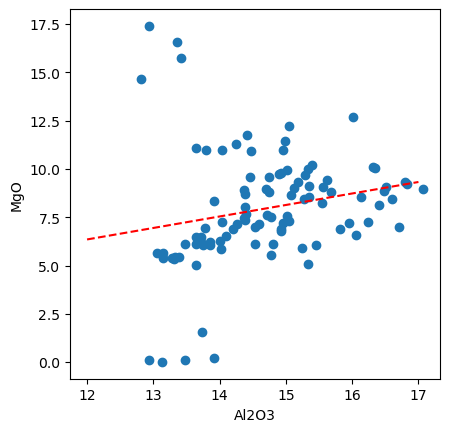

In [1]:
import numpy as np
import matplotlib.pyplot as plt

infile = '2023-06-WFJZKY_ICELAND1.txt'
d = np.loadtxt(infile, skiprows=1, unpack=True, usecols=(1,2,5,6,30,36), \
         dtype= { 'names': ('ID','Region', 'lat','lon','Al2O3','MgO'), \
                 'formats': ('U10', 'U10', 'f4', 'f4', 'f4', 'f4')}, \
                delimiter=',', quotechar='"', max_rows = 100)
#print(np.transpose(d))
plt.figure()


fig, ax = plt.subplots(1, 1)
ax.set_box_aspect(1)
plt.plot(d[4],d[5],'o')
reg_coeff = np.polyfit(d[4],d[5], 1)
x = np.linspace(12,17,20)
reg_line = reg_coeff[0]*x + reg_coeff[1]
plt.plot(x,reg_line,'--r')
plt.xlabel('Al2O3')
plt.ylabel('MgO')
plt.show()

C:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


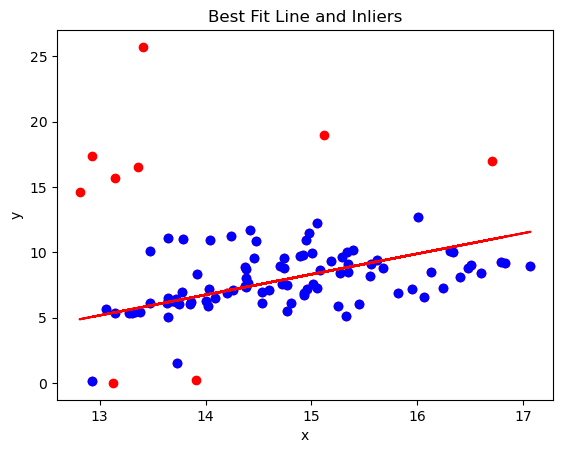

In [25]:
#RANSAC Algorithm - Line Fitting Example
import numpy as np 
import matplotlib.pyplot as plt
x = d[4] 
y = d[5]
#RANSAC algorithm
num_trials = 100 
inlier_threshold = 5 
best_model = None 

best_inlier_count = 0 
for i in range(num_trials): # Randomly choose two points 
    indices = np.random.randint(num_points, size=10)
    p1 = np.array([x[indices[0]], y[indices[0]]])
    p2 = np.array([x[indices[1]], y[indices[1]]])

    # Compute the model (line equation)
    model = np.polyfit([p1[0], p2[0]], [p1[1], p2[1]], 1)

    # Compute the inliers
    distances = np.abs(np.polyval(model, x) - y)
    inliers = distances < inlier_threshold
    inlier_count = np.sum(inliers)

    # Update the best model if necessary
    if inlier_count > best_inlier_count:
        best_model = model
        best_inlier_count = inlier_count
    
# Visualize the best fit line and inliers
x_inliers = x[np.abs(best_model[0]*x + best_model[1] - y) < inlier_threshold] 
y_inliers = y[np.abs(best_model[0]*x + best_model[1] - y) < inlier_threshold] 

plt.scatter(x, y, color='r') 
plt.scatter(x_inliers, y_inliers, color='b') 
plt.plot(x, np.polyval(best_model, x), color='r') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Best Fit Line and Inliers') 
plt.show()
    